# ANOVA

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("data/anova_sample.txt", sep = "\t")

In [24]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [25]:
df_melt = pd.melt(df.reset_index(), id_vars = ["index"], value_vars = ["A", "B", "C", "D"])

In [26]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [27]:
df_melt.columns = ["index", "treatments", "value"]

In [28]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

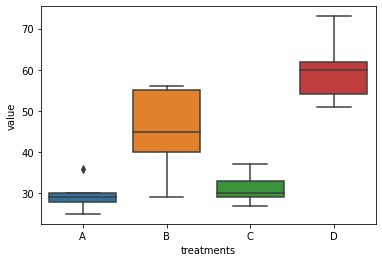

In [29]:
ax = sns.boxplot(x = "treatments", y = "value", data = df_melt)

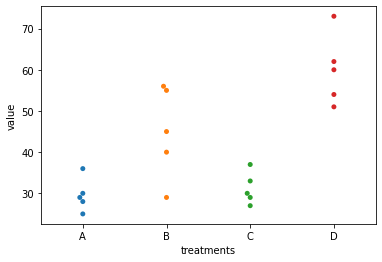

In [30]:
ax = sns.swarmplot(x = "treatments", y = "value", data = df_melt)

In [18]:
import scipy.stats as stats

In [20]:
fvalue, pvalue = stats.f_oneway(df["A"], df["B"], df["C"], df["D"])

In [21]:
fvalue, pvalue 

(17.492810457516338, 2.639241146210922e-05)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
model = ols("value ~ C(treatments)", data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


# Test de Student

In [33]:
X1 = [1, 1, 1, 2, 1]
X2 = [4, 2, 3, 1, 1]

In [34]:
X1, X2

([1, 1, 1, 2, 1], [4, 2, 3, 1, 1])

In [36]:
x1, pval1 = stats.shapiro(X1)
x2, pval2 = stats.shapiro(X2)

In [37]:
pval1, pval2

(0.00013097839837428182, 0.421149343252182)

In [39]:
y = stats.ttest_ind(X1, X2)

In [40]:
y

Ttest_indResult(statistic=-1.6222142113076257, pvalue=0.14341462050621775)

In [52]:
echantillon = X1
y = stats.ttest_1samp(echantillon, popmean = 1)

In [53]:
y

Ttest_1sampResult(statistic=0.9999999999999998, pvalue=0.373900966300059)

# Test du χ²

In [54]:
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]

In [59]:
df = pd.DataFrame(data, columns = ["Age Group", "Political Affiliation"])

In [60]:
df

,Age Group,Political Affiliation
0,18-29,Conservative
1,18-29,Conservative
2,18-29,Conservative
3,18-29,Conservative
4,18-29,Conservative
...,...,...
1184,65 & older,Socialist
1185,65 & older,Other
1186,65 & older,Other
1187,65 & older,Other


In [65]:
data_crosstab = pd.crosstab(df["Age Group"], 
                            df["Political Affiliation"],
                            margins = True, margins_name = "Total")

In [66]:
data_crosstab

Political Affiliation,Conservative,Other,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-65,220,4,216,440
65 & older,86,4,101,191
Total,626,19,544,1189
